In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import sweetviz
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder 
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler

# Read Dataset

In [2]:
df=pd.read_csv("insurance.csv")
df.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


# EDA With Sweetviz

In [3]:
my_report=sweetviz.analyze([df,"data"])

:FEATURES DONE:                    |                     | [  0%]   00:03  -> (00:00 left)
:PAIRWISE DONE:                    |█████████████████████| [100%]   00:00  -> (00:00 left)


Creating Associations graph... DONE!


In [4]:
my_report.show_html("Report.html")

In [5]:
df.shape

(1338, 7)

In [6]:
df.keys()

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

# Exploratory Data Analysis

# Missind Data

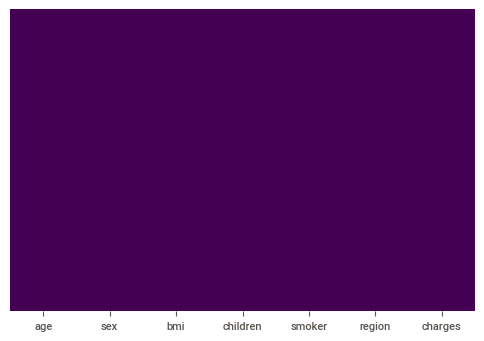

In [7]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [8]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [9]:
num=0
for i in df.columns:
    print(i,num)
    num+=1

age 0
sex 1
bmi 2
children 3
smoker 4
region 5
charges 6


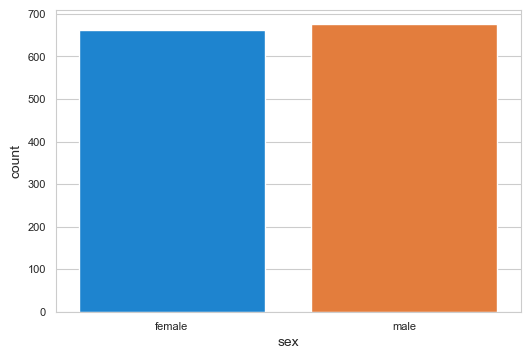

In [10]:
sns.set_style("whitegrid")
sns.countplot(x="sex",data=df)

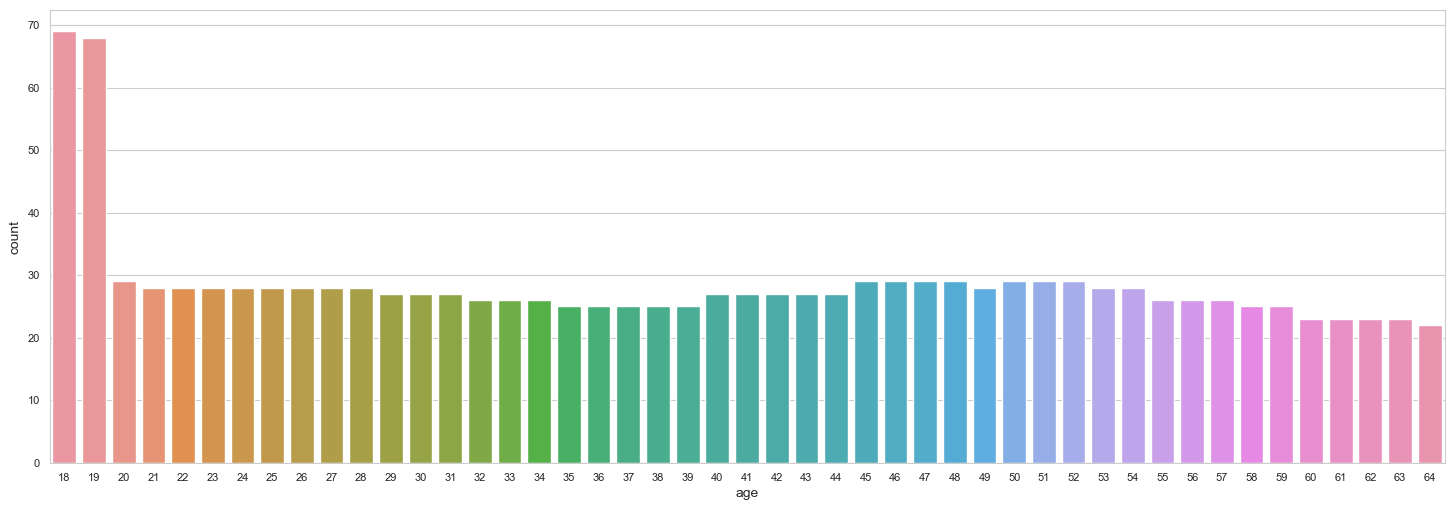

In [11]:
plt.figure(figsize=(18,6))
sns.set_style("whitegrid")
sns.countplot(x="age",data=df)

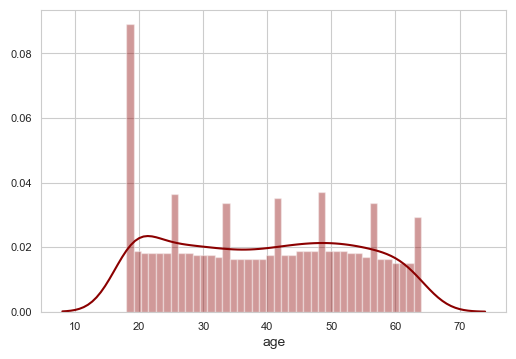

In [12]:
sns.set_style("whitegrid")
sns.distplot(df["age"],kde=True,bins=40,color="darkred")

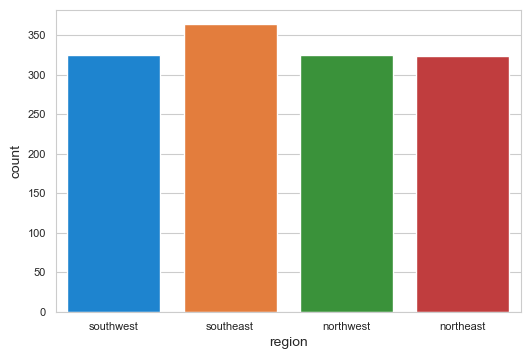

In [13]:
sns.set_style("whitegrid")
sns.countplot(df["region"]) 

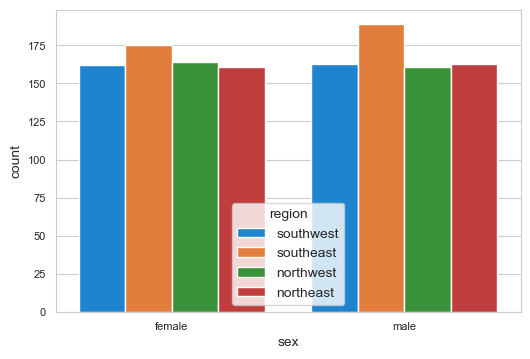

In [14]:
sns.set_style("whitegrid")
sns.countplot(x="sex",hue="region",data=df) 

In [15]:
df["region"].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

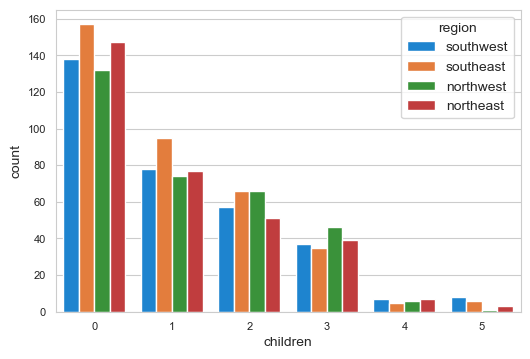

In [16]:
sns.set_style("whitegrid")
sns.countplot(x="children",hue="region",data=df)

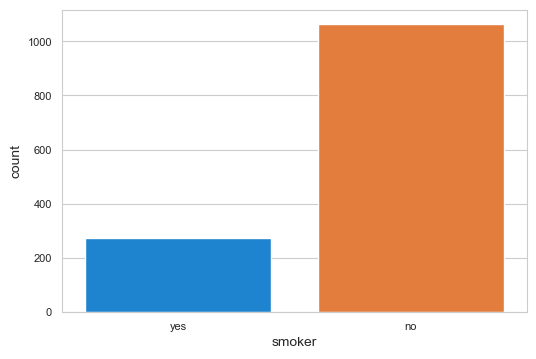

In [17]:
sns.countplot(x="smoker",data=df)

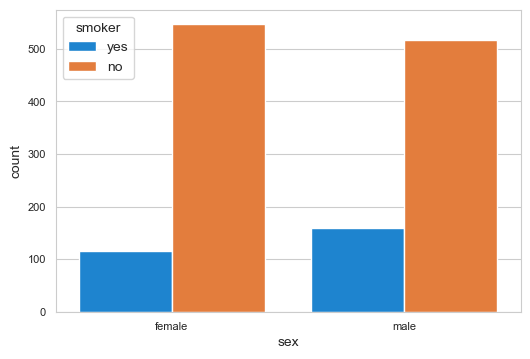

In [18]:
sns.countplot(x="sex",hue="smoker",data=df)

# BMI is a ratio that is used by life insurance companies to estimate individual’s health and fitness condition

In [19]:
mean=np.mean(df["bmi"])
mean1=np.min(df["bmi"])
mean2=np.max(df["bmi"])
print("This is mean of bmi=",mean)
print("This is min  of bmi=",mean1)
print("This is max  of bmi=",mean2)

This is mean of bmi= 30.663396860986538
This is min  of bmi= 15.96
This is max  of bmi= 53.13


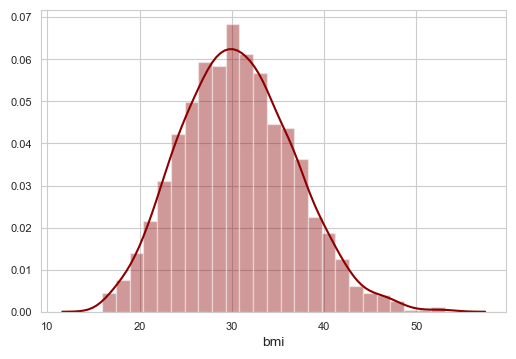

In [20]:
sns.distplot(df["bmi"],color="darkred")

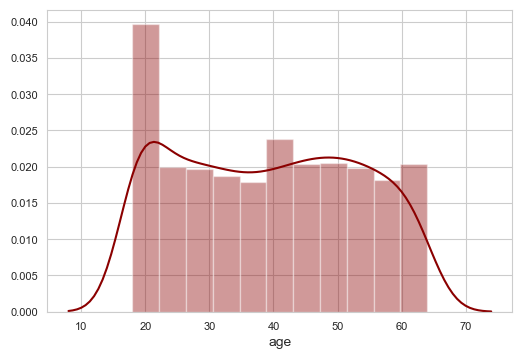

In [21]:
sns.distplot(df["age"],color="darkred")

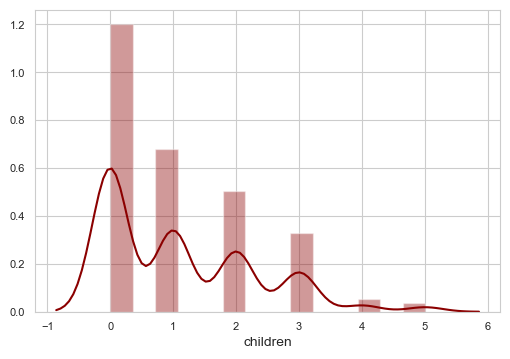

In [22]:
sns.distplot(df["children"],color="darkred")

In [23]:
mean_age=np.mean(df["age"])
mean

30.663396860986538

In [24]:
#df["ages"]=stats.zscore(df["age"])

# Find_Outliars

In [25]:
outliars=[]
def detect_outliar(data):
    threshold=3
    mean_age=np.mean(data)
    std_age=np.std(data)
    
    for v in data:
        z_score=(v-mean_age)/std_age
        if z_score > threshold:
            outliars.append(v)
            
    return outliars

In [26]:
detect_outliar(df["children"])

[5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5]

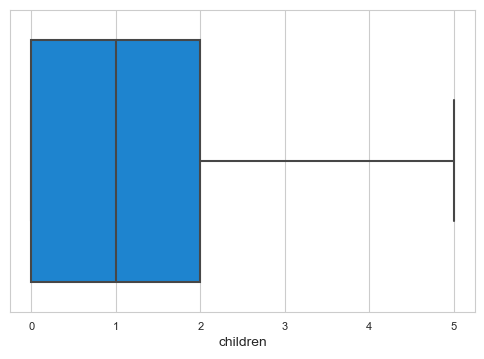

In [27]:
sns.boxplot(x="children",data=df)

In [28]:
df["children"].replace(to_replace =5,value =1,inplace=True) 

In [29]:
del outliars[0:]

In [30]:
detect_outliar(df["children"])

[]

In [31]:
del outliars[0:]

In [32]:
detect_outliar(df["bmi"])

[49.06, 50.38, 52.58, 53.13]

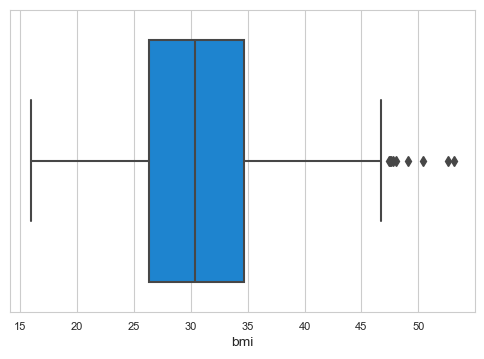

In [33]:
sns.boxplot(x="bmi",data=df)

In [34]:
df["bmi"].replace(to_replace=[49.06, 50.38, 52.58, 53.13],value=30,inplace=True) 

In [35]:
del outliars[0:]

In [36]:
detect_outliar(df["bmi"])

[]

In [37]:
detect_outliar(df["age"])

[]

# Data Convert into Gaussian distribution

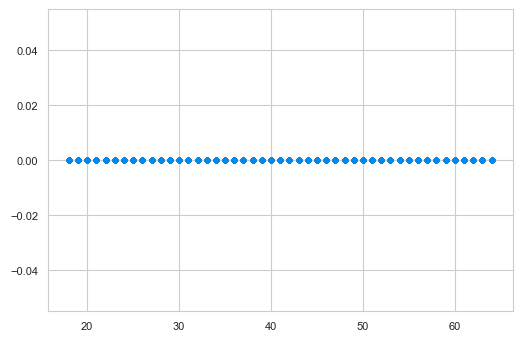

In [38]:
plt.scatter(x=df["age"],y=np.zeros_like(df["age"]))

In [39]:
def diagnostic_plots(df, variable):
    # function to plot a histogram and a Q-Q plot
    # side by side, for a certain variable
    
    plt.figure(figsize=(15,4))
    plt.subplot(1, 2, 1)
    df[variable].hist()

    plt.subplot(1, 2, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)

    plt.show()
    

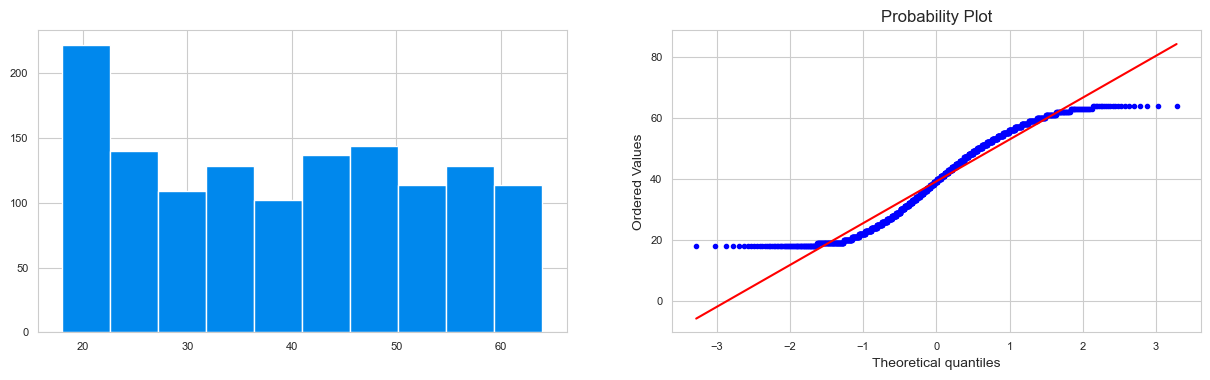

In [40]:
diagnostic_plots(df,'age')

Optimal lambda:  0.6208438790017822


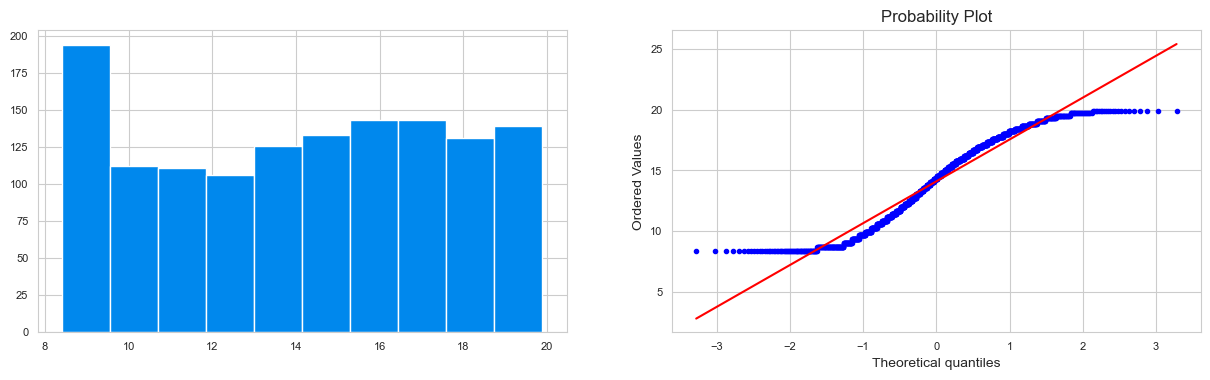

In [41]:
df['Age'], param = stats.boxcox(df.age+1) # you can vary the exponent as needed

print('Optimal lambda: ', param)

diagnostic_plots(df, 'Age')

# Categorical Data Handling

# Label Encoding,OneHotEncoding

In [42]:
for obj in df.select_dtypes(include=["object"]):
    print(obj)

sex
smoker
region


In [43]:
for uni in df.select_dtypes(include=["object"]):
    print(uni,"unique values",len(df[uni].unique()))

sex unique values 2
smoker unique values 2
region unique values 4


In [44]:
for uni in df.select_dtypes(include=["object"]):
    print(df[uni].value_counts())

male      676
female    662
Name: sex, dtype: int64
no     1064
yes     274
Name: smoker, dtype: int64
southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64


In [45]:
le=LabelEncoder()

In [46]:
df["sex"]=le.fit_transform(df["sex"])
df["smoker"]=le.fit_transform(df["smoker"])

In [47]:
One=pd.get_dummies(df["region"],drop_first=False)

In [48]:
labels=[y for y in df.region.value_counts().sort_values(ascending=False).head(10).index]
labels

['southeast', 'northwest', 'southwest', 'northeast']

In [49]:
def one_hot_encoding(data,variable,labels):
    for label  in labels:
        data[variable+'-'+label]=np.where(data[variable]==label,1,0)

In [50]:
one_hot_encoding(df,'region',labels)

In [51]:
df

,age,sex,bmi,children,smoker,region,charges,Age,region-southeast,region-northwest,region-southwest,region-northeast
0,19,0,27.900,0,1,southwest,16884.92400,8.734852,0,0,1,0
1,18,1,33.770,1,0,southeast,1725.55230,8.410586,1,0,0,0
2,28,1,33.000,3,0,southeast,4449.46200,11.419110,1,0,0,0
3,33,1,22.705,0,0,northwest,21984.47061,12.771542,0,1,0,0
4,32,1,28.880,0,0,northwest,3866.85520,12.507436,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,northwest,10600.54830,16.888452,0,1,0,0
1334,18,0,31.920,0,0,northeast,2205.98080,8.410586,0,0,0,1
1335,18,0,36.850,0,0,southeast,1629.83350,8.410586,1,0,0,0
1336,21,0,25.800,0,0,southwest,2007.94500,9.365501,0,0,1,0


# Feature_Selection

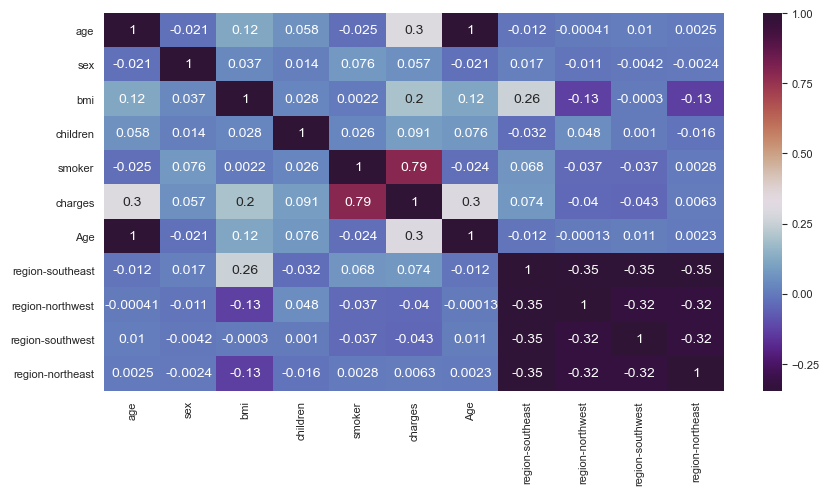

In [52]:
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(),annot=True,cmap="twilight_shifted")

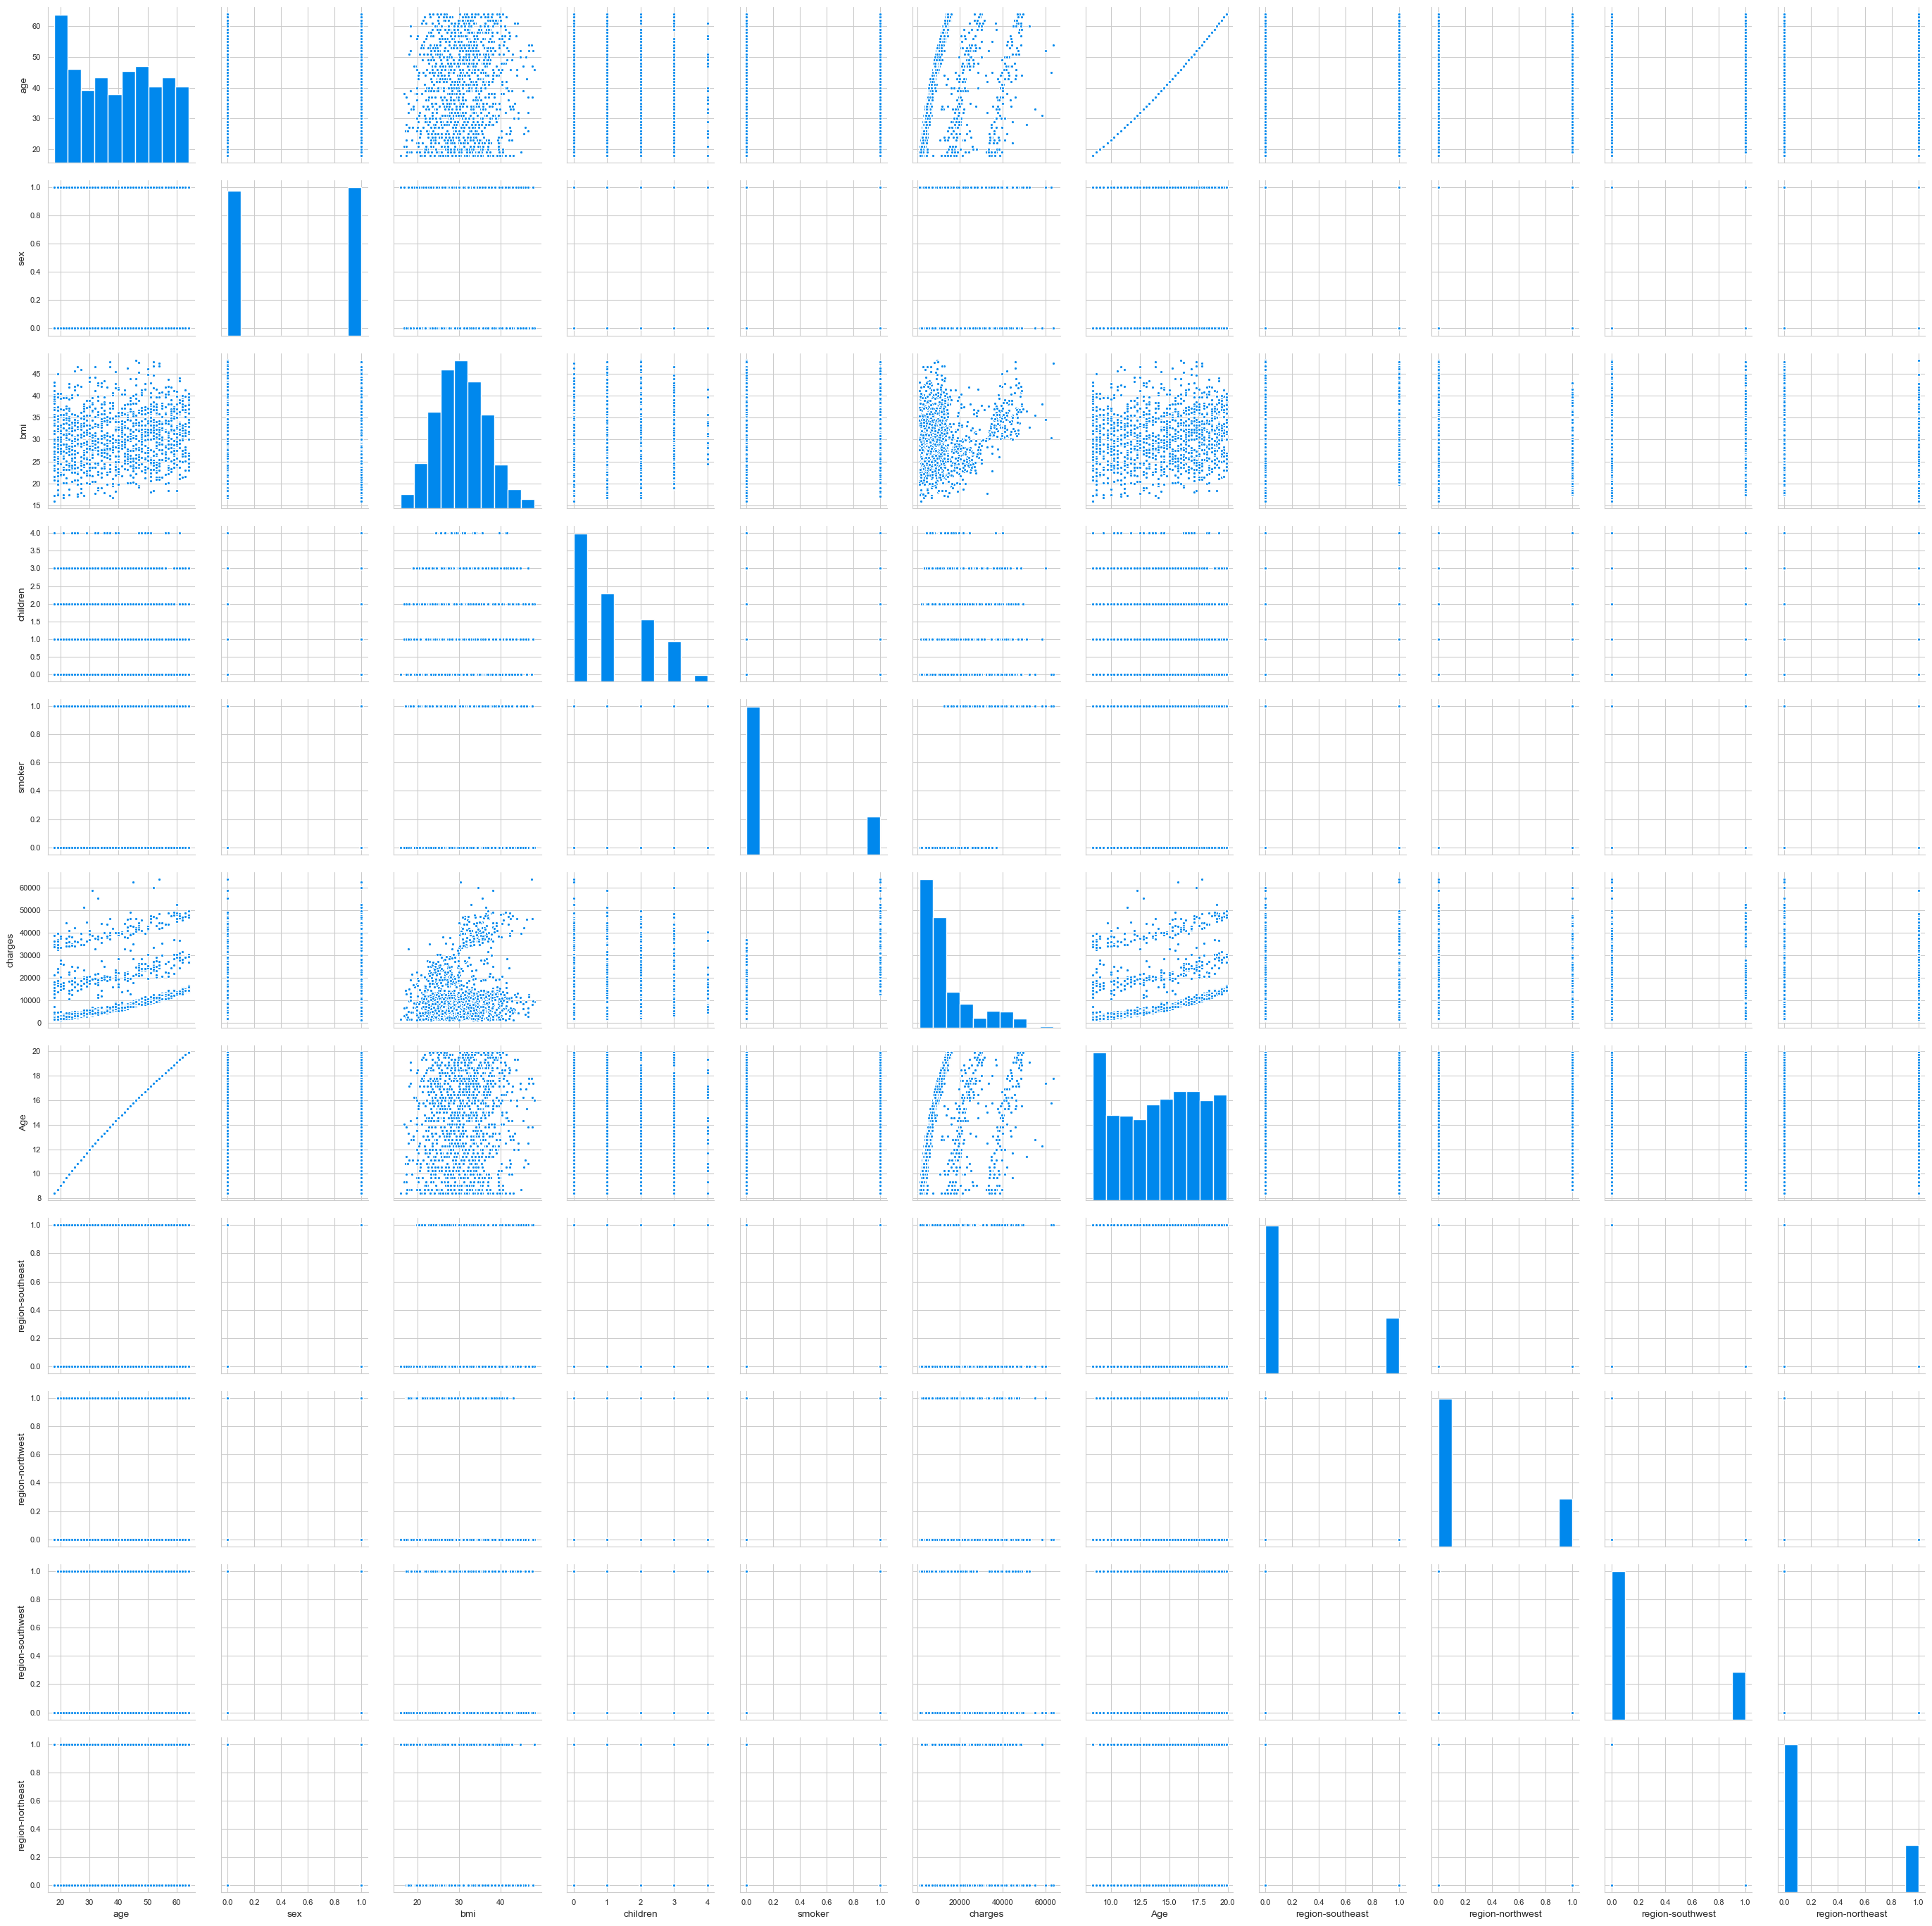

In [53]:
sns.pairplot(df)

In [54]:
x=df.drop(["charges","region","Age"],axis=1)
y=df["charges"]
x.head()

,age,sex,bmi,children,smoker,region-southeast,region-northwest,region-southwest,region-northeast
0,19,0,27.900,0,1,0,0,1,0
1,18,1,33.770,1,0,1,0,0,0
2,28,1,33.000,3,0,1,0,0,0
3,33,1,22.705,0,0,0,1,0,0
4,32,1,28.880,0,0,0,1,0,0


In [106]:
y.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

In [121]:
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=0.10,random_state=0)

In [122]:
sc=StandardScaler()

In [123]:
#train_x=sc.fit_transform(train_x)
#test_x=sc.fit_transform(test_x)

# Model_Selection

In [124]:
Reg=RandomForestRegressor(n_estimators=400)

In [125]:
Reg.fit(train_x,train_y)
pred_y=Reg.predict(test_x)

In [126]:
print(Reg.score(train_x,train_y)*100)
print(Reg.score(test_x,test_y)*100)

97.5680630342814
90.15077828646598


In [127]:
pre=[28,1,33.000,3,0,1,0,0,0]

In [128]:
pre1=Reg.predict([pre])

In [129]:
print(pre1)

[5413.82905135]


# Model_Evaluation

In [130]:
from sklearn.metrics import r2_score

In [131]:
print("Accuracy Of Model: {}".format(r2_score(test_y,pred_y)*100) ) 

Accuracy Of Model: 90.15077828646598
